In [11]:
import matplotlib
import PIL
import scipy
import os

In [27]:
clistfile = 'color_list.csv'
# change this
pic_file = 'lego.png'
pic_file = 'indiaflag.jpg'

#dont need to change these
repo_path = os.path.dirname(os.getcwd())
img_path = '/img'
testfile = repo_path + img_path + '/' + pic_file

In [32]:
from matplotlib import image as img
image = img.imread(testfile)
image.shape

3

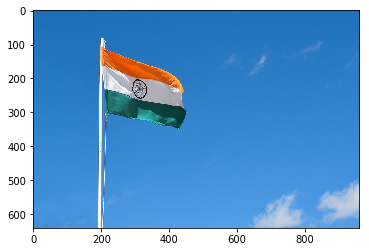

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(image)
plt.show()

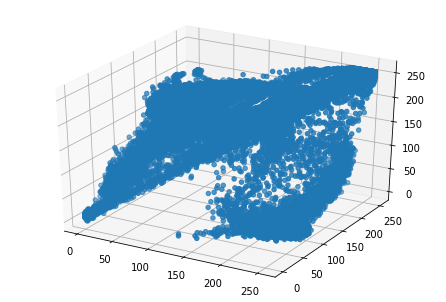

In [44]:
show_plot = True

r = []
g = []
b = []

if len(image[0][0]) == 4:
    for line in image:
        for pixel in line:
            temp_r, temp_g, temp_b, _ = pixel
            r.append(temp_r)
            g.append(temp_g)
            b.append(temp_b)
elif len(image[0][0]) == 3:
    for line in image:
        for pixel in line:
            temp_r, temp_g, temp_b = pixel
            r.append(temp_r)
            g.append(temp_g)
            b.append(temp_b)

if show_plot==True:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(r, g, b)
    plt.show()

In [36]:
import pandas as pd
df = pd.DataFrame({'red': r,
'blue': b,
'green': g})

In [37]:
from scipy.cluster.vq import whiten
df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])
df.sample(n = 10)

,red,blue,green,scaled_red,scaled_blue,scaled_green
274901,11,61,66,0.269590,1.816682,2.854647
230831,200,203,198,4.901640,6.045678,8.563942
112996,38,194,122,0.931312,5.777643,5.276772
512158,71,221,149,1.740082,6.581748,6.444582
577415,77,227,155,1.887131,6.760438,6.704096
183488,38,193,120,0.931312,5.747862,5.190268
185334,40,195,122,0.980328,5.807425,5.276772
427509,61,214,141,1.495000,6.373277,6.098564
4626,31,184,111,0.759754,5.479827,4.800998
579392,78,228,156,1.911640,6.790220,6.747348


In [41]:
from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 4)

In [42]:
print(cluster_centers)

[[1.58821384 6.21236941 6.42676382]
 [0.9711661  5.21870142 5.69181348]
 [2.86613092 3.45057338 1.23066404]
 [4.47505884 8.40455861 6.30584518]]


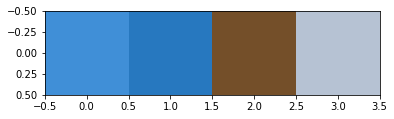

In [43]:
colors = []
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center    
    colors.append((
    scaled_r * r_std / 255,
    scaled_g * g_std / 255,
    scaled_b * b_std / 255
    ))
plt.imshow([colors])
plt.show()